## 1. Environment Configuration

In [1]:
# Basic modules
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import re

In [53]:
# Display settings
pd.set_option('display.max_columns', 60)
pd.set_option('precision', 2)
%matplotlib inline

## 2. Data Exploration

### Data loading into DataFrame:

In [3]:
# training dataset (cars data scraped from online car markelplace)
car_data = pd.read_csv('./Results/raw_data_f.csv')

### A glance on the training data structure:

In [4]:
car_data.head()

,Cena,Oferta od,Kategoria,Marka pojazdu,Model pojazdu,Rok produkcji,Przebieg,Pojemność skokowa,Rodzaj paliwa,Moc,Skrzynia biegów,Napęd,Typ,Liczba drzwi,Liczba miejsc,Kolor,Zarejestrowany w Polsce,Stan,Wersja,Generacja,Metalik,Pierwsza rejestracja,Bezwypadkowy,Kod Silnika,Możliwość finansowania,Faktura VAT,Leasing,Numer rejestracyjny pojazdu,Serwisowany w ASO,Kraj pochodzenia,Pierwszy właściciel,VAT marża,Miesięczna rata,lub do (przebieg km),Filtr cząstek stałych,Emisja CO2,Perłowy,Homologacja ciężarowa,Akryl (niemetalizowany),Gwarancja dealerska (w cenie),Uszkodzony,Tuning,VIN,Matowy,Okres gwarancji producenta,Kierownica po prawej (Anglik),Opłata początkowa,Liczba pozostałych rat,Wartość wykupu,Zarejestrowany jako zabytek
0,30800PLN,Osoby prywatnej,Osobowe,Kia,Pro_cee'd,2013,75 000 km,1 582 cm3,Diesel,111 KM,Manualna,Na przednie koła,Kompakt,3.0,5.0,Biały,Tak,Używane,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,10600PLN,Osoby prywatnej,Osobowe,Opel,Corsa,2007,63 000 km,1 229 cm3,Benzyna,80 KM,Manualna,Na przednie koła,Auta miejskie,3.0,5.0,Srebrny,Tak,Używane,1.2 16V Enjoy,D (2006-2014),Tak,29/12/2007,Tak,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,89790PLN,Osoby prywatnej,Osobowe,BMW,Seria 5,2015,151 000 km,1 995 cm3,Diesel,184 KM,Automatyczna,4x4 (dołączany automatycznie),Sedan,NaN,NaN,Biały,Tak,Używane,F10/F11 (2009-2017),F10/F11 (2009-2017),NaN,NaN,Tak,520,Tak,Tak,Tak,WB908AP,Tak,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,58500PLN,Osoby prywatnej,Osobowe,Chrysler,Town & Country,2014,158 000 km,3 605 cm3,Benzyna+LPG,283 KM,Automatyczna,Na przednie koła,Minivan,5.0,7.0,Srebrny,Tak,Używane,NaN,II (2001-),Tak,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Stany Zjednoczone,Tak,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,17900PLN,Osoby prywatnej,Osobowe,Ford,Galaxy,2006,224 000 km,1 997 cm3,Diesel,140 KM,Manualna,Na przednie koła,Minivan,5.0,7.0,Czarny,NaN,Używane,2.0 TDCi Ghia,Mk2 (2006-2015),Tak,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Tak,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
print("Shape(rows, cols):", car_data.shape)

Shape(rows, cols): (5014, 50)


In [6]:
print("Info:") 
print(car_data.info())

Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5014 entries, 0 to 5013
Data columns (total 50 columns):
Cena                             5014 non-null object
Oferta od                        5014 non-null object
Kategoria                        5014 non-null object
Marka pojazdu                    5014 non-null object
Model pojazdu                    5014 non-null object
Rok produkcji                    5014 non-null int64
Przebieg                         5014 non-null object
Pojemność skokowa                4960 non-null object
Rodzaj paliwa                    5014 non-null object
Moc                              4962 non-null object
Skrzynia biegów                  4965 non-null object
Napęd                            4220 non-null object
Typ                              5014 non-null object
Liczba drzwi                     4874 non-null float64
Liczba miejsc                    4389 non-null float64
Kolor                            5014 non-null object
Zarejestrowany w Polsc

In [7]:
car_data.describe()

,Rok produkcji,Liczba drzwi,Liczba miejsc,Liczba pozostałych rat
count,5014.00,4874.00,4389.00,5.00
mean,2010.93,4.68,5.04,27.20
std,3.03,0.70,0.66,5.26
min,2005.00,2.00,2.00,21.00
25%,2009.00,5.00,5.00,24.00
50%,2011.00,5.00,5.00,26.00
75%,2014.00,5.00,5.00,31.00
max,2015.00,6.00,9.00,34.00


#### Comment:

Dataset consists of 5014 observations (rows) and 50 attributes (columns). It is very small dataset. Moreover, there is a lot missing data!

### Modelling raw data (pre-cleaning):

Firstly, I decided to drop columns which, IMO, do not have impact on the price (e.g. info about registration, invoice, homogeneous columns (Kategoria, Stan) etc.).

In [8]:
# Deleting useless cols
car_data.drop(columns=['Kategoria', 'Pierwsza rejestracja', 'Możliwość finansowania', 'Faktura VAT', 'Leasing', 
                     'Numer rejestracyjny pojazdu', 'VAT marża', 'Miesięczna rata', 'lub do (przebieg km)',
                     'VIN', 'Okres gwarancji producenta', 'Opłata początkowa', 'Liczba pozostałych rat', 
                     'Wartość wykupu', 'Stan'], inplace=True)

#### Comment:

Although the percentage of missing values for some attributes is high, deleting these columns is not so obvious - in some cases 'NaN' means 'No' what can be crucial information for our model. Moreover, it is good to check how many unique and not 'Nan' values we have in "missing" columns.

In [9]:
# Percentage of missing values for each attribute
miss_vals = (car_data.isnull().sum() / len(car_data)) * 100

# Attributes with missing data only
feat_miss = miss_vals[miss_vals != 0].sort_values(ascending=False)

# DF for missing values with info about number of unique (NaN not included!) and not NaN values
df_feat_miss_unique = pd.DataFrame(feat_miss).rename(columns={0: 'percentage'})
df_feat_miss_unique['unique'] = car_data[feat_miss.index].nunique()
df_feat_miss_unique['not_nan'] = car_data[feat_miss.index].notnull().sum()
df_feat_miss_unique

,percentage,unique,not_nan
Zarejestrowany jako zabytek,99.98,1,1
Kierownica po prawej (Anglik),99.82,1,9
Matowy,99.54,1,23
Homologacja ciężarowa,99.12,1,44
Tuning,99.04,1,48
Gwarancja dealerska (w cenie),98.50,4,75
Uszkodzony,98.40,1,80
Emisja CO2,97.33,59,134
Akryl (niemetalizowany),96.87,1,157
Kod Silnika,96.81,52,160


#### Comment:

According to the above I decided to drop all columns with percentage of missing data > 85. For the rest, if number of unique values = 1, NaN will be replaced with opposite value to the unique one.

In [10]:
# Columns with at least 85% of missing values
feat_miss_85 = miss_vals[miss_vals > 85].index

# Deleting cols with at least 85% of missing values
car_data.drop(columns=feat_miss_85, inplace=True)

In [11]:
# Changing column names
car_data.rename(columns={'Oferta od': 'Oferta_od', 'Marka pojazdu': 'Marka', 'Model pojazdu': 'Model', 
                       'Rok produkcji': 'Rok_prod', 'Pojemność skokowa': 'Pojemność', 'Rodzaj paliwa': 'Paliwo', 
                       'Skrzynia biegów': 'Skrzynia', 'Liczba drzwi': 'L_drzwi', 'Liczba miejsc': 'L_miejsc', 
                       'Zarejestrowany w Polsce': 'Zarej_w_PL', 'Bezwypadkowy': 'Bezwyp', 
                       'Serwisowany w ASO': 'Serwis_ASO', 'Kraj pochodzenia': 'Kraj_prod', 
                       'Pierwszy właściciel': '1_właść'}, inplace=True)

In [12]:
# Changing data types on categorical
car_data['L_drzwi'] = car_data['L_drzwi'].astype('object')
car_data['L_miejsc'] = car_data['L_miejsc'].astype('object')
car_data['Rok_prod'] = car_data['Rok_prod'].astype('object')

In [13]:
# Removing currency (PLN) and changing datatype
car_data['Cena'] = car_data['Cena'].apply(lambda x: re.match('^([0-9]+)', x).group()).astype('int64')

In [14]:
# Removing unit (km) and changing datatype
car_data['Przebieg'] = car_data['Przebieg'].apply(lambda x: re.match('^([0-9]+)', x.replace(" ", "")).group()).astype('int64')

In [15]:
# Replacing NaN values with '0' (string) to have possibility to use '.replace' and regex
car_data['Pojemność'] = car_data['Pojemność'].fillna('0')
# Removing unit (cm3) and changing datatype
car_data['Pojemność'] = car_data['Pojemność'].apply(lambda x: re.match('^([0-9]+)', x.replace(" ", "")).group()).astype('int64')
# Replacing zeros ('0') back to NaN values
car_data.loc[car_data['Pojemność'] == 0, 'Pojemność'] = np.nan

In [16]:
# Replacing NaN values with '0' (string) to have possibility to use '.replace' and regex
car_data['Moc'] = car_data['Moc'].fillna('0')
# Removing unit (KM) and changing datatype
car_data['Moc'] = car_data['Moc'].apply(lambda x: re.match('^([0-9]+)', x.replace(" ", "")).group()).astype('int64')
# Replacing zeros ('0') back to NaN values
car_data.loc[car_data['Moc'] == 0, 'Moc'] = np.nan

In [17]:
# Unification of values in 'Metalik' column ('metallic' value equals to 'Tak')
car_data.loc[car_data['Metalik'] == 'metallic', 'Metalik'] = "Tak"

In [18]:
# Replacing NaN values with opposite value for binary categories
car_data['Zarej_w_PL'] = car_data['Zarej_w_PL'].fillna('Nie')
car_data['Metalik'] = car_data['Metalik'].fillna('Nie')
car_data['Bezwyp'] = car_data['Bezwyp'].fillna('Nie')
car_data['Serwis_ASO'] = car_data['Serwis_ASO'].fillna('Nie')
car_data['1_właść'] = car_data['1_właść'].fillna('Nie')

In [19]:
car_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5014 entries, 0 to 5013
Data columns (total 23 columns):
Cena          5014 non-null int64
Oferta_od     5014 non-null object
Marka         5014 non-null object
Model         5014 non-null object
Rok_prod      5014 non-null object
Przebieg      5014 non-null int64
Pojemność     4960 non-null float64
Paliwo        5014 non-null object
Moc           4962 non-null float64
Skrzynia      4965 non-null object
Napęd         4220 non-null object
Typ           5014 non-null object
L_drzwi       4874 non-null object
L_miejsc      4389 non-null object
Kolor         5014 non-null object
Zarej_w_PL    5014 non-null object
Wersja        2454 non-null object
Generacja     3887 non-null object
Metalik       5014 non-null object
Bezwyp        5014 non-null object
Serwis_ASO    5014 non-null object
Kraj_prod     3090 non-null object
1_właść       5014 non-null object
dtypes: float64(2), int64(2), object(19)
memory usage: 901.1+ KB


### Data visualization:
#### Split into numerical and categorical values:

In [20]:
num_cols = []
cat_cols = []

for col in car_data.columns:
    if car_data.dtypes[col] in ['int64', 'float64']:
        num_cols.append(col)
    else:
        cat_cols.append(col)

num_data = car_data[num_cols]
cat_data = car_data[cat_cols]

#### - Numerical data:

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000000134C13DA88>,
      dtype=object)

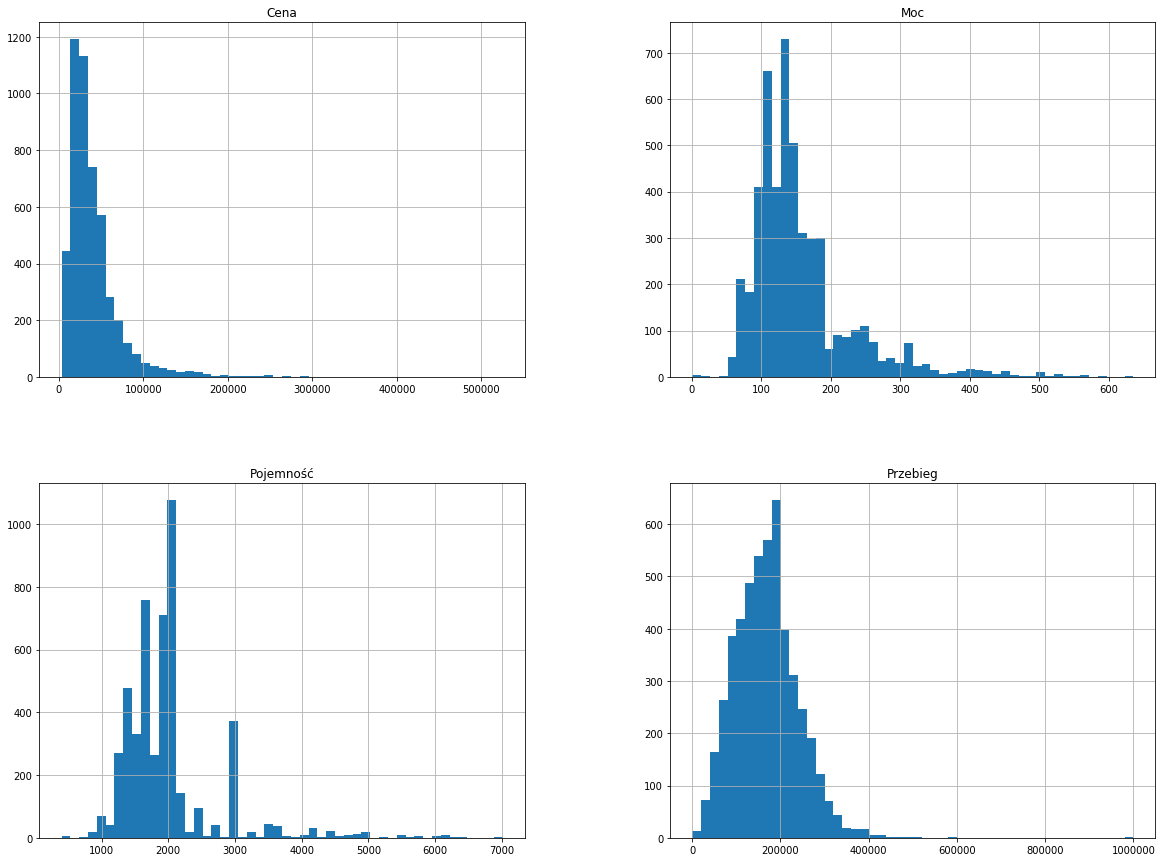

In [21]:
num_data.hist(bins=50, figsize=(20, 15))

#### Comment:

1. Generally, above histograms are characterized by heavy-tailed distribution and it can be problematic for ML algorithms to find patterns in data.
2. Attributes has different scales so probably there is a need to use scalling.

           Cena  Przebieg  Pojemność   Moc
Cena       1.00     -0.27       0.59  0.71
Przebieg  -0.27      1.00       0.13  0.02
Pojemność  0.59      0.13       1.00  0.89
Moc        0.71      0.02       0.89  1.00


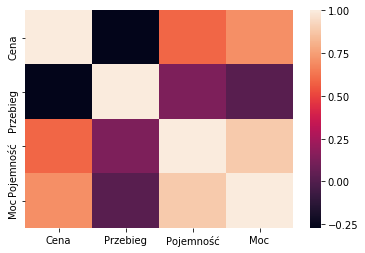

In [22]:
correlation = num_data.corr()
print(correlation)

sns.heatmap(correlation)

#### Comment:

The price (Cena) the most depends on engine volume (Pojemność) and engine power (Moc), the least - mileage (Przebieg). The total highest correlation is between engine volume (Pojemność) engine power (Moc) - it is rather logical. 

#### - Categorical data:

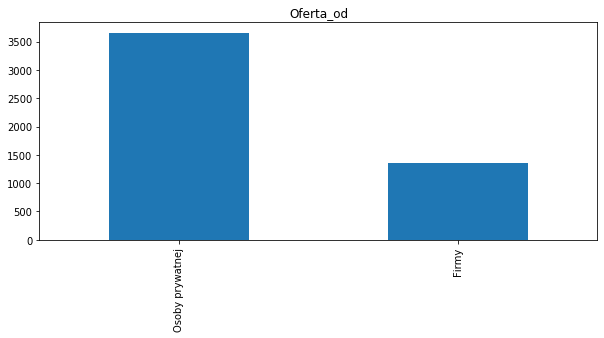

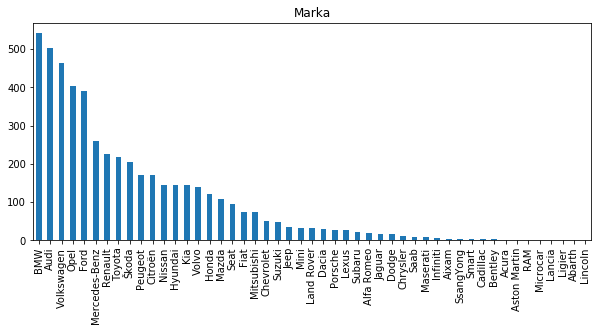

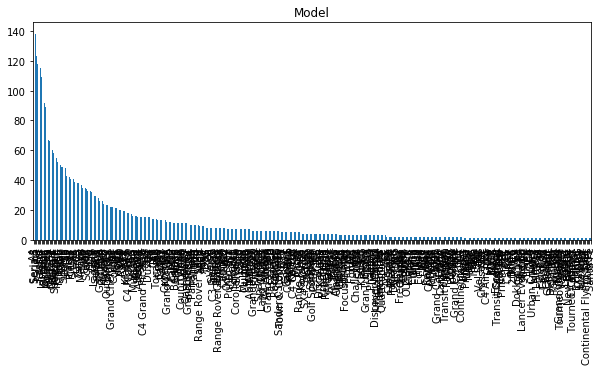

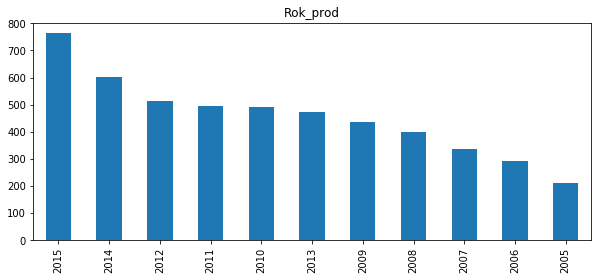

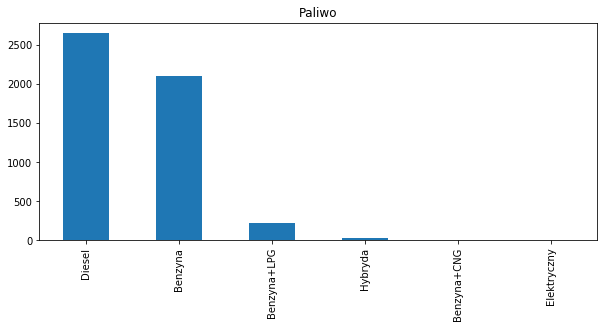

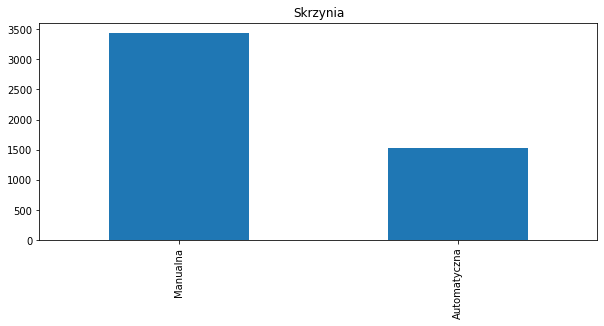

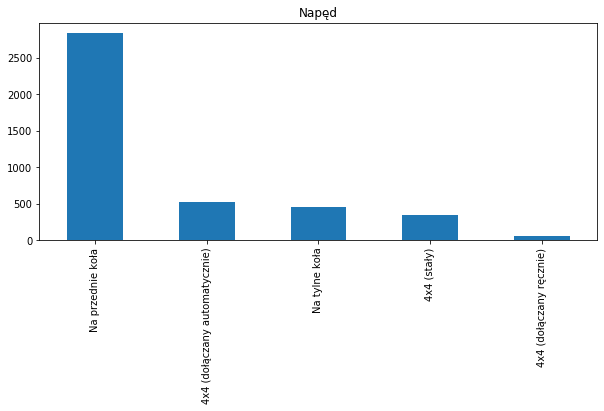

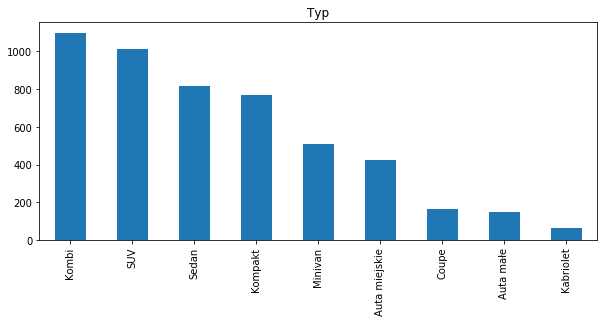

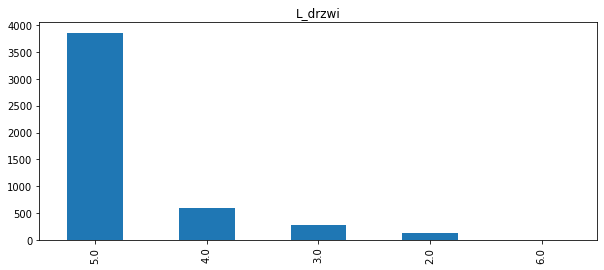

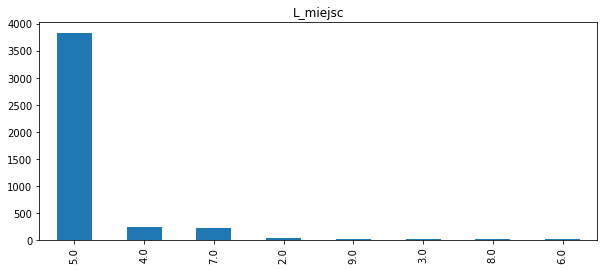

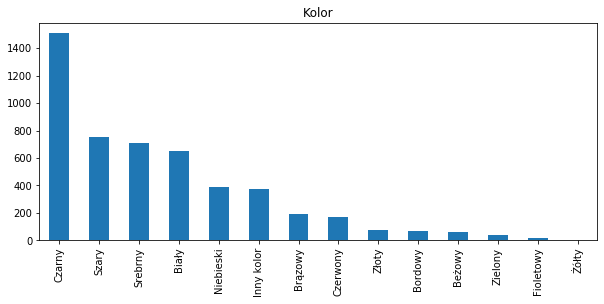

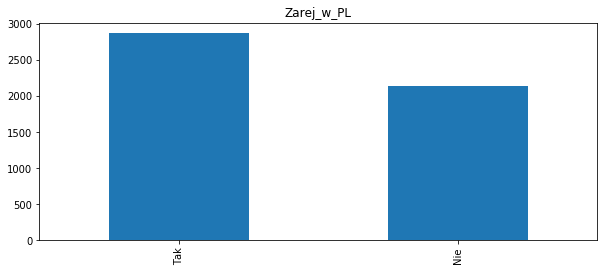

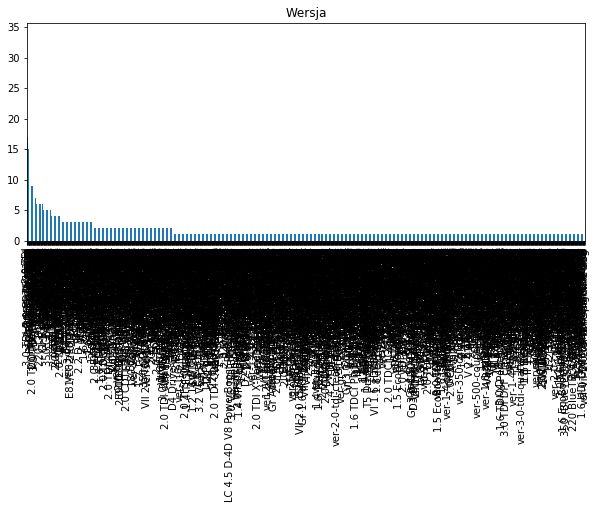

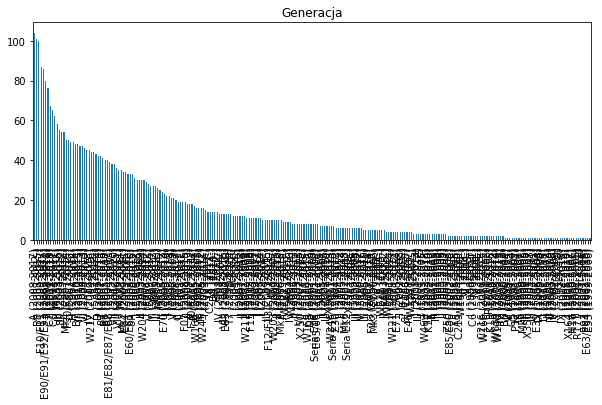

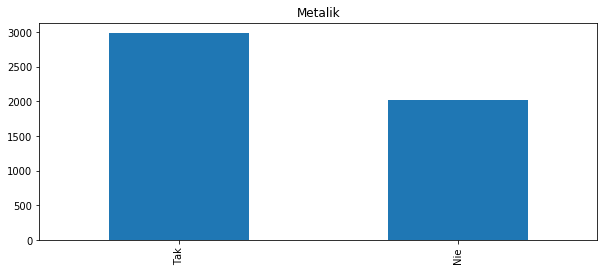

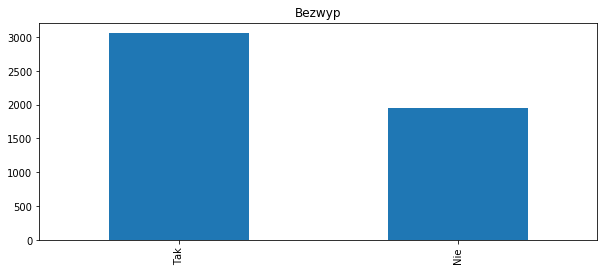

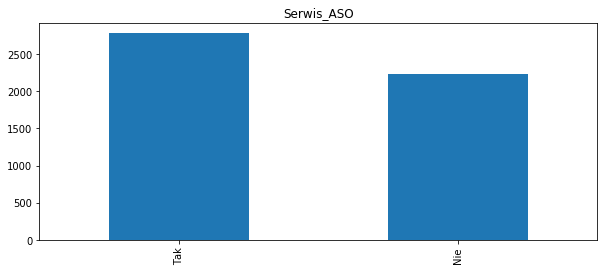

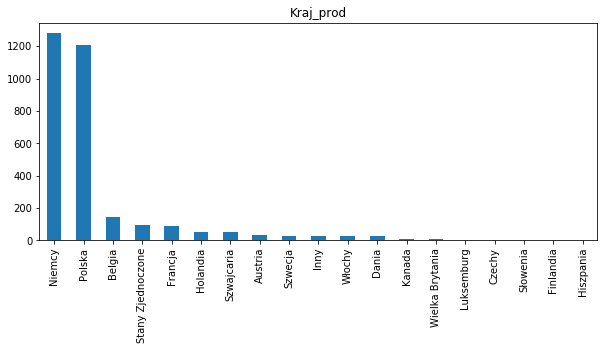

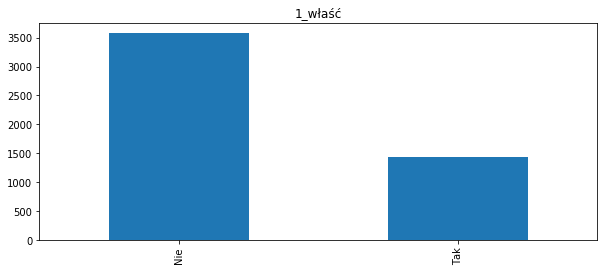

In [23]:
for col in cat_data.columns:
    cat_data[col].value_counts().plot(kind='bar', figsize=(10,4))
    plt.title(col)
    plt.show()

## 3. Data preprocessing

### Outliers

In [24]:
def idxs_of_outliers(x):
    """Returns indexes of rows with outliers which are > 1.5 IQR or < 1.5 IQR"""
    q1, q3 = np.percentile(x, [25, 75])
    iqr = q3 - q1
    lower_bound = q1 - (iqr * 1.5)
    upper_bound = q3 + (iqr * 1.5)
    return np.where((x > upper_bound) | (x < lower_bound))

# Number of outliers in numerical columns
# Reminder: num_cols = ['Cena', 'Przebieg', 'Pojemność', 'Moc']
for col in num_cols:
    idxs = idxs_of_outliers(car_data[col])
    print(col, len(idxs[0]))

Cena 279
Przebieg 60
Pojemność 0
Moc 0


C:\Users\Maciek\Anaconda3\lib\site-packages\numpy\lib\function_base.py:3826: RuntimeWarning: Invalid value encountered in percentile
  interpolation=interpolation)


In [25]:
# list of unique indexes with outliers
outliers = list(set(idxs_of_outliers(car_data['Cena'])[0].tolist() + idxs_of_outliers(car_data['Przebieg'])[0].tolist()))

# Dropping of indexes with outliers from train set
car_data.drop(car_data.index[outliers], inplace=True)
print("car_data:")
print(car_data.shape)
print(car_data.describe())

car_data:
(4675, 23)
           Cena   Przebieg  Pojemność      Moc
count   4675.00    4675.00    4627.00  4626.00
mean   34273.05  168936.45    1883.33   146.39
std    18754.77   65714.85     588.91    57.97
min     3000.00     172.00     400.00     1.00
25%    19900.00  120760.50    1560.00   110.00
50%    29900.00  169100.00    1900.00   140.00
75%    45000.00  211243.00    1997.00   170.00
max    92250.00  350000.00    6200.00   544.00


### Extracting train and test set

In [26]:
from sklearn.model_selection import train_test_split

train_set, test_set = train_test_split(car_data, test_size=0.2, random_state=1)

In [27]:
print(train_set.shape)
print(test_set.shape)

(3740, 23)
(935, 23)


## TRAIN SET

### Extracting target from the train set

In [28]:
X = train_set.drop('Cena', axis=1)
y = train_set['Cena']

print(X.shape)
print(y.shape)

(3740, 22)
(3740,)


### Preprocessing

#### - Missing values:

In [29]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer

# columns to replace NaNs with 'most_frequent' value
cols_imputer_1 = ['Skrzynia', 'Napęd', 'L_drzwi', 'L_miejsc']
# columns to replace NaNs with 'constant' value
cols_imputer_2 = ['Wersja', 'Generacja', 'Kraj_prod']
# columns to replace NaNs with 'median' value
cols_imputer_3 = ['Moc', 'Pojemność']   

# Pipelines for filling missing data:
miss_pipeline_1 = Pipeline([('imputer', SimpleImputer(strategy="most_frequent"))])
miss_pipeline_2 = Pipeline([('imputer', SimpleImputer(strategy="constant", fill_value="Inny"))])
miss_pipeline_3 = Pipeline([('imputer', SimpleImputer(strategy="median"))])

# Column transformations (imputing pipelines into specific columns)
preproc_miss_data = ColumnTransformer(transformers=[
    ('miss_pipeline_1', miss_pipeline_1, cols_imputer_1),
    ('miss_pipeline_2', miss_pipeline_2, cols_imputer_2),
    ('miss_pipeline_3', miss_pipeline_3, cols_imputer_3)],
    remainder='passthrough'
)

# 'ColumnTransformer' changes order of columns (and rows) - on the beginning are columns (and rows) 
# with missing data (cols_imputer_1, cols_imputer_2... <- in order like in 'ColumnTransformer') 
# and then the rest (in order like in DF before transformation). So if we need DF with filled all 
# NaNs we need take into account new column order.

# all columns with missing data
columns = cols_imputer_1 + cols_imputer_2 + cols_imputer_3

# columns without missing data
c = [col for col in X.columns if col not in columns]

# new column order
columns += c

# Applying transformation onto data
preproc_miss_data.fit(X)

# New DF (X_train after transformation) with fullfilled NaNs 
# (new order of cols and rows, but data inside OK)
X_trans = pd.DataFrame(columns=columns, data=preproc_miss_data.transform(X))
    
X_trans.head(3)

,Skrzynia,Napęd,L_drzwi,L_miejsc,Wersja,Generacja,Kraj_prod,Moc,Pojemność,Oferta_od,Marka,Model,Rok_prod,Przebieg,Paliwo,Typ,Kolor,Zarej_w_PL,Metalik,Bezwyp,Serwis_ASO,1_właść
0,Manualna,Na przednie koła,5,5,Inny,B8 (2007-2015),Niemcy,1.6e+02,1.8e+03,Osoby prywatnej,Audi,A4,2008,170000,Benzyna,Kombi,Biały,Tak,Nie,Tak,Tak,Nie
1,Manualna,Na przednie koła,5,5,1.6 Ambiente,Mk2 (2004-2011),Niemcy,1e+02,1.6e+03,Osoby prywatnej,Ford,Focus,2006,147312,Benzyna,Kompakt,Zielony,Tak,Tak,Nie,Nie,Nie
2,Manualna,4x4 (dołączany automatycznie),4,5,Cooper D ALL4,Inny,Niemcy,1.1e+02,1.6e+03,Osoby prywatnej,Mini,Countryman,2013,166000,Diesel,Kompakt,Czarny,Nie,Tak,Tak,Tak,Nie


#### - Feature engineering (encoding, scaling):

In [30]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import StandardScaler
from scipy import stats
import category_encoders as ce

# categorical columns to encode with One-Hot Encoding
cols_encode_OHE = ['Oferta_od', 'Napęd', 'Typ', 'Skrzynia', 'Zarej_w_PL', 
                   'Metalik', 'Bezwyp', 'Serwis_ASO', '1_właść']

# One-Hot Encoding
OHE_encoder = OneHotEncoder(sparse=False)
X_OHE = pd.DataFrame(OHE_encoder.fit_transform(X_trans[cols_encode_OHE]))
X_OHE.index = X_trans.index
X_trans = pd.concat([X_trans, X_OHE], axis=1)
X_trans.drop(columns=cols_encode_OHE, inplace=True)

In [31]:
# categorical columns to encode with Count Encoding
cols_encode_CE = ['Marka', 'Model', 'Kolor', 'Generacja', 'Kraj_prod', 'Paliwo']

# Count Encoding
CE_encoder = ce.CountEncoder()
X_CE = CE_encoder.fit_transform(X_trans[cols_encode_CE])
X_trans.drop(columns=cols_encode_CE, inplace=True)
X_trans = pd.concat([X_trans, X_CE], axis=1)

In [32]:
# categorical columns to encode with Label Encoding
cols_encode_LE = ['Rok_prod']

# Label Encoding
LE_encoder = LabelEncoder()
X_LE = LE_encoder.fit_transform(X_trans[cols_encode_LE])
X_LE = pd.DataFrame(columns=cols_encode_LE, data=X_LE)
X_trans.drop(columns=cols_encode_LE, inplace=True)
X_trans = pd.concat([X_trans, X_LE], axis=1)

C:\Users\Maciek\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [33]:
# categorical columns to encode with Hash Encoding
cols_encode_HE = ['Wersja']

# Hash Encoding
HE_encoder = ce.HashingEncoder(n_components=10, cols=cols_encode_HE)
X_HE = HE_encoder.fit_transform(X_trans)
X_trans.drop(columns=cols_encode_HE, inplace=True)
X_trans = X_trans

In [34]:
# categorical columns to change datatype to numerical (encode back to numerical values)
cols_convert_to_num = ['L_drzwi', 'L_miejsc']

# Changing cat. data types on numerical
X_trans[cols_convert_to_num] = X_trans[cols_convert_to_num].astype('int32')

In [35]:
# numerical columns to scale with RobustScaler
cols_scale_RS = ['Przebieg']

# Robust Scalling
RS_scaler = RobustScaler()
X_RS = pd.DataFrame(RS_scaler.fit_transform(X_trans[cols_scale_RS]))
X_trans.drop(columns=cols_scale_RS, inplace=True)
X_trans = pd.concat([X_trans, X_RS], axis=1)

In [36]:
# numerical columns to scale with Normalization and Standarization
cols_scale_N_S = ['Pojemność', 'Moc']

# Normalization and Standarization
X_trans[cols_scale_N_S] = X_trans[cols_scale_N_S].astype('int32')
X_N_S = np.log(X_trans[cols_scale_N_S])
S_scaler = StandardScaler()
X_N_S = S_scaler.fit_transform(X_N_S)
X_N_S = pd.DataFrame(columns=cols_scale_N_S, data=X_N_S)
X_trans.drop(columns=cols_scale_N_S, inplace=True)
X_trans = pd.concat([X_trans, X_N_S], axis=1)

In [37]:
# Preprocessed (transformed) training data
X_trans.head()

,L_drzwi,L_miejsc,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,Marka,Model,Kolor,Generacja,Kraj_prod,Paliwo,Rok_prod,0,Pojemność,Moc
0,5,5,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,364,109,469,80,981,1586,3,0.01,-0.02,0.43
1,5,5,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,303,68,23,28,981,1586,1,-0.24,-0.47,-0.86
2,4,5,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,24,10,1089,817,981,1962,8,-0.03,-0.46,-0.55
3,5,7,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,14,3,562,7,872,1962,4,0.25,1.86,1.60
4,5,5,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,364,89,1089,48,872,1586,0,0.74,1.03,0.71


## 4. Model selection

In [38]:
from sklearn.model_selection import cross_val_score

from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

# Models with default settings
model_1 = LinearRegression()
model_2 = DecisionTreeRegressor(random_state=1)
model_3 = RandomForestRegressor(random_state=1)

scores_mse_m1 = np.sqrt(-1 * cross_val_score(model_1, X_trans, y, scoring="neg_mean_squared_error", cv=5))
scores_mse_m2 = np.sqrt(-1 * cross_val_score(model_2, X_trans, y, scoring="neg_mean_squared_error", cv=5))
scores_mse_m3 = np.sqrt(-1 * cross_val_score(model_3, X_trans, y, scoring="neg_mean_squared_error", cv=5))

print("RMSE")
print("\nModel_1:", "\n- Results: ", scores_mse_m1, "\n- Avg: ", scores_mse_m1.mean(), "\n- Std: ", scores_mse_m1.std())
print("\nModel_2:", "\n- Results: ", scores_mse_m2, "\n- Avg: ", scores_mse_m2.mean(), "\n- Std: ", scores_mse_m2.std())
print("\nModel_3:", "\n- Results: ", scores_mse_m3, "\n- Avg: ", scores_mse_m3.mean(), "\n- Std: ", scores_mse_m3.std())

C:\Users\Maciek\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Maciek\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Maciek\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Maciek\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Maciek\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:2

RMSE

Model_1: 
- Results:  [8543.42418116 9099.54844014 9157.00167632 9055.06890032 9267.98769031] 
- Avg:  9024.606177649668 
- Std:  250.93567410913826

Model_2: 
- Results:  [11074.85233602 11552.42344798 10948.97111092 10505.71571717
 10656.65071718] 
- Avg:  10947.722665853576 
- Std:  363.84600301336303

Model_3: 
- Results:  [8185.5813103  8460.46375483 8008.32160062 7953.06521706 8504.35147679] 
- Avg:  8222.356671919013 
- Std:  226.22881316635042


#### Comment: 

The best model with default parameters: **RandomForestRegressor (Model_3)**

## 5. Parameters tuning


In [39]:
from sklearn.model_selection import GridSearchCV

# possible parameters
params = {"n_estimators": [100, 200],
          "criterion": ["mse"],
          "max_depth": [5, 10],
          "n_jobs": [-1]}


gridsearch = GridSearchCV(model_3, param_grid=params, scoring="neg_mean_squared_error", cv=5, return_train_score=True)
gridsearch.fit(X_trans, y)

# Parameters of the best model:
print(gridsearch.best_params_, '\n')

print(gridsearch.best_estimator_)

# Quality of tuned model:
results = gridsearch.cv_results_
print("\nTuned model RMSE:", np.sqrt(-(max(results["mean_test_score"]))))

{'criterion': 'mse', 'max_depth': 10, 'n_estimators': 200, 'n_jobs': -1} 

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=10,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=200, n_jobs=-1,
                      oob_score=False, random_state=1, verbose=0,
                      warm_start=False)

Tuned model RMSE: 7881.1294037041935


#### Comment:

Tuning of hyperparameters let us decrease RMSE from 8222.36 to 7881.13, but we can try to improve it more by increasing *max_depth* parameter.

In [40]:
# possible values of max_depth:
params_2 = {"n_estimators": [100],
          "criterion": ["mse"],
          "max_depth": [10, 20, 50, 70, 100],
          "min_samples_split": [2],
          "n_jobs": [-1]}

gridsearch_2 = GridSearchCV(model_3, param_grid=params_2, scoring="neg_mean_squared_error", cv=5)
gridsearch_2.fit(X_trans, y)

# Parameters of the best model:
print(gridsearch_2.best_params_)

# Quality of tuned model:
results_2 = gridsearch_2.cv_results_
print("Tuned model RMSE:", np.sqrt(-(max(results_2["mean_test_score"]))))

{'criterion': 'mse', 'max_depth': 20, 'min_samples_split': 2, 'n_estimators': 100, 'n_jobs': -1}
Tuned model RMSE: 7781.768240167145


#### Comment:

Finally our the best model achieved **RMSE = 7781.77** for *max_depth* = 20.

## 6. Predictions on test dataset

#### - Extracting target from the test set:

In [41]:
final_model = gridsearch_2.best_estimator_

X_test = test_set.drop('Cena', axis=1)
y_test = test_set['Cena']

#### - Missing values:

In [42]:
# # Applying transformation onto test data
preproc_miss_data.fit(X_test)

# New DF (X_train after transformation) with fullfilled NaNs 
# (new order of cols and rows, but data inside OK)
X_test_trans = pd.DataFrame(columns=columns, data=preproc_miss_data.transform(X_test))
    
X_test_trans.head(3)

,Skrzynia,Napęd,L_drzwi,L_miejsc,Wersja,Generacja,Kraj_prod,Moc,Pojemność,Oferta_od,Marka,Model,Rok_prod,Przebieg,Paliwo,Typ,Kolor,Zarej_w_PL,Metalik,Bezwyp,Serwis_ASO,1_właść
0,Automatyczna,Na przednie koła,5,5,2.0 16V VTR Pack,I (2004-2010),Niemcy,1.4e+02,2e+03,Osoby prywatnej,Citroën,C4,2006,158648,Benzyna,Kompakt,Czarny,Nie,Tak,Nie,Tak,Nie
1,Automatyczna,Na przednie koła,4,5,Inny,A (2008-2017),Polska,1.7e+02,1.6e+03,Firmy,Opel,Insignia,2014,89908,Benzyna,Sedan,Srebrny,Tak,Tak,Nie,Tak,Nie
2,Automatyczna,4x4 (dołączany automatycznie),5,5,E83 (2003-2010),E83 (2003-2010),Inny,2.2e+02,3e+03,Osoby prywatnej,BMW,X3,2007,212734,Diesel,SUV,Biały,Nie,Tak,Nie,Nie,Nie


#### - Feature engineering (encoding, scaling):

In [43]:
# One-Hot Encoding
X_test_OHE = pd.DataFrame(OHE_encoder.fit_transform(X_test_trans[cols_encode_OHE]))
X_test_OHE.index = X_test_trans.index
X_test_trans = pd.concat([X_test_trans, X_test_OHE], axis=1)
X_test_trans.drop(columns=cols_encode_OHE, inplace=True)

In [44]:
# Count Encoding
X_test_CE = CE_encoder.fit_transform(X_test_trans[cols_encode_CE])
X_test_trans.drop(columns=cols_encode_CE, inplace=True)
X_test_trans = pd.concat([X_test_trans, X_test_CE], axis=1)

In [45]:
# Label Encoding
X_test_LE = LE_encoder.fit_transform(X_test_trans[cols_encode_LE])
X_test_LE = pd.DataFrame(columns=cols_encode_LE, data=X_test_LE)
X_test_trans.drop(columns=cols_encode_LE, inplace=True)
X_test_trans = pd.concat([X_test_trans, X_test_LE], axis=1)

C:\Users\Maciek\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [46]:
# Hash Encoding
X_test_HE = HE_encoder.fit_transform(X_test_trans)
X_test_trans.drop(columns=cols_encode_HE, inplace=True)
X_test_trans = X_test_trans

In [47]:
# Changing cat. data types on numerical
X_test_trans[cols_convert_to_num] = X_test_trans[cols_convert_to_num].astype('int32')

In [48]:
# Robust Scalling
X_test_RS = pd.DataFrame(RS_scaler.fit_transform(X_test_trans[cols_scale_RS]))
X_test_trans.drop(columns=cols_scale_RS, inplace=True)
X_test_trans = pd.concat([X_test_trans, X_test_RS], axis=1)

In [49]:
# Normalization and Standarization
X_test_trans[cols_scale_N_S] = X_test_trans[cols_scale_N_S].astype('int32')
X_test_N_S = np.log(X_test_trans[cols_scale_N_S])
X_test_N_S = S_scaler.fit_transform(X_test_N_S)
X_test_N_S = pd.DataFrame(columns=cols_scale_N_S, data=X_test_N_S)
X_test_trans.drop(columns=cols_scale_N_S, inplace=True)
X_test_trans = pd.concat([X_test_trans, X_test_N_S], axis=1)

In [52]:
X_test_trans.head()

,L_drzwi,L_miejsc,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,Marka,Model,Kolor,Generacja,Kraj_prod,Paliwo,Rok_prod,0,Pojemność,Moc
0,5,5,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,32,2,286,3,251,400,1,-0.13,0.35,0.07
1,4,5,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,77,23,129,21,215,400,9,-0.91,-0.46,0.54
2,5,5,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,105,10,113,3,362,482,2,0.49,1.83,1.17
3,5,5,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,79,24,286,18,215,482,10,-0.22,-0.55,-0.88
4,5,5,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,77,23,113,21,362,482,9,0.27,0.28,0.07


In [51]:
from sklearn.metrics import mean_squared_error

final_preds = final_model.predict(X_test_trans)

final_mse = mean_squared_error(y_test, final_preds)
final_rmse = np.sqrt(final_mse)
final_rmse

8909.6782856425

## 7. Results export

In [54]:
import sklearn
from sklearn.externals import joblib

# Scikit-Learn version info
sklearn_version = sklearn.__version__

# Saving model into pickle
joblib.dump(final_model, './Results/final_model_{}.pkl)'.format(sklearn_version))

C:\Users\Maciek\Anaconda3\lib\site-packages\sklearn\externals\joblib\__init__.py:15: DeprecationWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=DeprecationWarning)


['./Results/final_model_0.21.3.pkl)']